# Titanic Data Analysis

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship[a] and the deadliest peacetime sinking of a superliner or cruise ship to date.[4] With much public attention in the aftermath, the disaster has since been the material of many artistic works and a founding material of the disaster film genre.

# Titanic Data Analysis with Python

We will import all the required libraries for plotting and analysing the data set. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data set contains information about : 
PassengerId , Survived , Pclass , Name , Sex , Age , SibSp , Parch , Ticket , Fare , Cabin , Embarked.
 So let's get started with the task of of titanic data analysis.

In [23]:
titanic=pd.read_csv('https://raw.githubusercontent.com/ashmanmalhotra/Data-Analysis-Project-Assignment/main/02%20-%20Titanic%20Data%20Analysis/titanic_data.csv')
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Next, I wanna check whether the our data frame df contains NaN (Not a Number) values, which can be done like this:

In [21]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Now we calculate the number of persons who survived and who got dead in this incident.

In [8]:
survived_count=titanic.Survived.value_counts()
print(survived_count)

0    549
1    342
Name: Survived, dtype: int64


Based on the output above, we can see that there are 549 people who were not survived. To make things look better, I wanna display these numbers in form of graph. Here I will use bar() function coming from Matplotlib module. The function is pretty easy to understand. The two parameters that we need to pass is just the index name and its values.

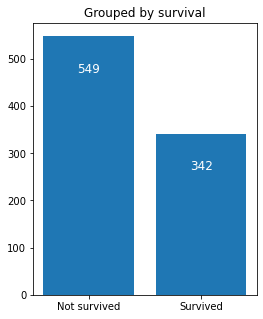

In [11]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

Now I will also do the similar thing in order to find out the number of survived persons based on their gender. Notice that here I use sum() instead of count() because we are only interested to calculate the number of survived passengers which are represented by number 1. So it’s kinda like adding 1s in each group.

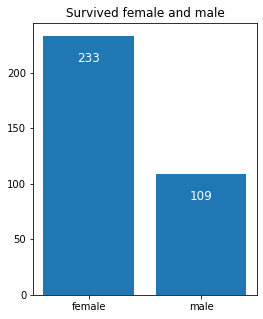

In [12]:
survived_sex = titanic.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

Next, I wanna find out the distribution of ticket classes where the attribute is stored at Pclass column. The way to do it is pretty much similar to the one I created earlier.

Now that there are 3 values stored in pclass_count variable in which each of those represents the number of tickets in each class. However, instead of printing out a graph here I prefer to display it in form of pie chart using pie() function.

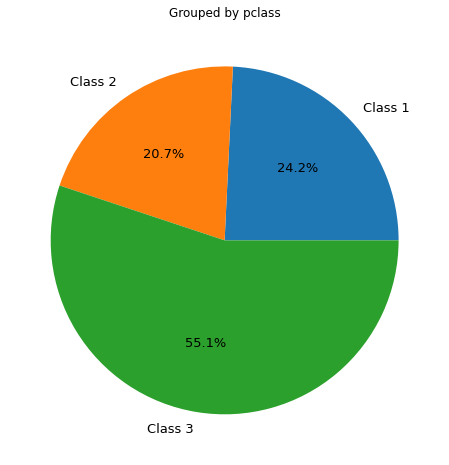

In [19]:
pclass_count = titanic.groupby('Pclass')['Pclass'].count()
plt.figure(figsize=(8,8))
plt.title("Grouped by pclass")
plt.pie(pclass_count.values, labels=["Class 1", "Class 2", "Class 3"],
        autopct="%1.1f%% ", textprops={"fontsize":13})
plt.show()

Fare attributes might also play an important role to predict whether a passenger is survived. Different to the previous figures, here instead of using bar or pie chart, I will create a boxplot. Fortunately, it’s extremely simple to do that as basically it can be shown just by using plt.boxplot() function.

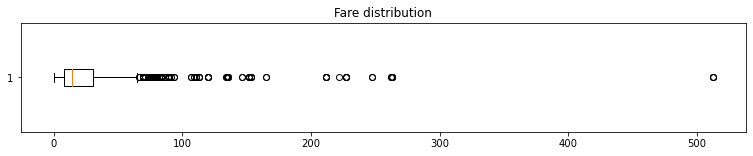

In [14]:
plt.figure(figsize=(13,2))
plt.title("Fare distribution")
plt.boxplot(titanic["Fare"], vert=False)
plt.show()

# Summary

So this is how you can find patterns about the people who travelled in the titanic. We can visualise all kinds of data and make pictorial representation of it so that the data can be easily grasped and then you can derive various results from it.